<a href="https://colab.research.google.com/github/munich-ml/MLPy2020/blob/master/recap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2020-05-19

## Progmming language popularity

- [TOIBE popularity index](https://www.tiobe.com/tiobe-index/) ratings based on search quantities of 25 engines (Google, Baidu,.. but also Wikipedia)
> 1. C
> 1. Java
> 1. **Python** 
- [PYPL](http://pypl.github.io/) measures how often language tutorials are googled by exploring Google Trends.
> 1. **Python** 
> 1. Java
> 1. JavaScript
- [GitHub statistics](https://madnight.github.io/githut/#/pull_requests/2020/1) percentage pull-requests / commits / issues on GitHub.
> 1. JavaScript
> 1. **Python** 
- [Stackoverflow survey 2019](https://insights.stackoverflow.com/survey/2019): Key result #1: *Python, the fastest-growing major programming language, has risen in the ranks of programming languages in our survey yet again, edging out Java this year and standing as the second most loved language (behind Rust).*
> 1. JavaScript
> 1. HTML/CSS
> 1. SQL
> 1. **Python** 

## `str.format()` issue

`str` concatanation within `print()`:

In [0]:
line = "header"
lineNo = 2
print("'" + line + "' found in line no. " + str(lineNo) + "!") 

'header' found in line no. 2!


Formatted string using `format()`

In [0]:
print("'{}' found in line no. {}!".format(line, lineNo))

'header' found in line no. 2!


**Format specifiers** may be added

In [0]:
print("'{}' found in line no. {:.1f}!".format(line, lineNo))

'header' found in line no. 2.0!


Placeholders can be **blank `{}`** for automatic, **positional `{0}`** for manual numbering or referenced by **keyword `{keyword}`**: 

In [0]:
print("'{0}' found in line no. {1:.0%}!".format(line, lineNo))

'header' found in line no. 200%!


However, switching form automatic to manual numbering raises an exception:

In [0]:
try:
    print("'{}' found in line no. {1:.0%}!".format(line, lineNo))
except ValueError as e:
    print("ValueError:", str(e))

ValueError: cannot switch from automatic field numbering to manual field specification


**Further reading**: [format() tutorial](https://www.programiz.com/python-programming/methods/string/format)

### f string available from Python 3.6

In [0]:
print(f"'{line}' found in line no. {lineNo:.1f}!")

'header' found in line no. 2.0!


## scope issue

Bug in `string_to_float` function: `item` wasn't defined locally:

In [0]:
def string_to_float(s):
    try:
        print("item: " + str(item))
    except NameError as e:
        print("NameError:", str(e))

In [0]:
some_str = "12.3 Ohms"

In [0]:
string_to_float(some_str)

NameError: name 'item' is not defined


### Get local scope with `dir()`
Build-in function `dir()` returns the list of names in the current local scope. 

In [0]:
dir()

['In',
 'Out',
 '_',
 '_31',
 '_32',
 '_44',
 '_45',
 '_53',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i51',
 '_i52',
 '_i53',
 '_i54',
 '_i55',
 '_i56',
 '_i57',
 '_i58',
 '_i59',
 '_i6',
 '_i60',
 '_i61',
 '_i62',
 '_i63',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 '_sh',
 'exit',
 'get_ipython',
 'line',
 'lineNo',
 'np',
 'quit',
 'some_str',
 'string_to_float']

In [0]:
[v for v in dir() if not v.startswith("_")]

['In',
 'Out',
 'exit',
 'get_ipython',
 'line',
 'lineNo',
 'np',
 'quit',
 'some_str',
 'string_to_float']

Redifine `string_to_float` to print the function's local scope:

In [0]:
def string_to_float(s):
    print("Local scope: " + str([v for v in dir() if not v.startswith("_")]))
    try:
        print("item: " + str(item))
    except NameError as e:
        print("NameError:", str(e))

In [0]:
string_to_float(some_str)

Local scope: ['s']
NameError: name 'item' is not defined


**Exception** because `item` doesn't exist in local or global scope.

No exception occurs, if `item` is defined in the global scope.

In [0]:
for item in ["4.67 mOhms", "1.23"]:
    string_to_float(item)

Local scope: ['s']
item: 4.67 mOhms
Local scope: ['s']
item: 1.23


In [0]:
del item

### Static code analysis
The use of static code analysis (e.y. Pylint) is highly recommended. 

## `import` a module

In [0]:
try:
    print(np.pi)
except NameError as e:
    print("NameError:", str(e))

3.141592653589793


`np` must be defined first

In [0]:
import numpy as np

In [0]:
np.pi

3.141592653589793

Alternatively, import the functions that are specifically needed:

In [0]:
from numpy import pi, eye

In [0]:
pi

3.141592653589793

In [0]:
del pi, eye

In [0]:
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__doc__',
 '__file__',
 '__git_revision__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_distributor_init',
 '_global

In [0]:
dir()

['In',
 'Out',
 '_',
 '_31',
 '_32',
 '_44',
 '_45',
 '_53',
 '_63',
 '_64',
 '_71',
 '_73',
 '_75',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i51',
 '_i52',
 '_i53',
 '_i54',
 '_i55',
 '_i56',
 '_i57',
 '_i58',
 '_i59',
 '_i6',
 '_i60',
 '_i61',
 '_i62',
 '_i63',
 '_i64',
 '_i65',
 '_i66',
 '_i67',
 '_i68',
 '_i69',
 '_i7',
 '_i70',
 '_i71',
 '_i72',
 '_i73',
 '_i74',
 '_i75',
 '_i76',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 '_sh',
 'exit',
 'get_ipython',
 'line',
 'lineNo',
 'np',

**Antipattern:**

In [0]:
from numpy import *

In [0]:
pi

3.141592653589793

That worked, **BUT**...

In [0]:
dir()

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'In',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'Out',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_',
 '_31',
 '_32',
 '_44',
 '_45',
 '_53',
 '_63',
 '_64',
 '_71',
 '_73',
 '_75',
 '_76',
 '_78',
 '_UFUNC_API',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_dh',
 '_i',
 

Import statement like `from MODULE import *` should be avoided!

Detecting undefined names in the program becomes rather difficult. 

As a general best practice, import statements should be as specific as possible and should only import what they need.

## `12_Logfile_challenge.ipynb` recap

- `!git clone https://github.com/munich-ml/MLPy2020/` for getting `logfile.csv`
- task: Parsing the logfile from `s`, `<type 'str'>`  
- `lines = s.split("\n")`
- `<type 'list'>` is iterable: `for line in lines:`
- `<type 'dict'>` for key-value lookup, like `idxs = {'header': 2, 'measurements': 8}`
- `<type 'set'>` for set operations like `union`, `diff`
- 2-dim `data` became a list of lists: `data[row][col]`, that doesn't support matrix operations like element-wise multiplication or arbitrary indexing.


In [0]:
data = [[0.1, 43], [0.2, 58]]
data

[[0.1, 43], [0.2, 58]]

# 2020-05-20

## `15_NumPy.ipynb` recap

**NumPy** is made for matrix math and is very fast

`numpy.array`
- is the basic NumPy datatype
- may have 1, 2 or N dimensions
- all items have the same datatype
- provide arbitrary indexing
- provide element-wise operations

NumPy provides various *concatanation methods*
- `np.column_stack()` supports horizontal stacking of 2D and 1D arrays


In [0]:
import numpy as np
np.column_stack(([[0.1, 5], [0.2, 7]],
                 [3.3, 4.4]))

array([[0.1, 5. , 3.3],
       [0.2, 7. , 4.4]])

## `16_Matplotlib.ipynb` recap

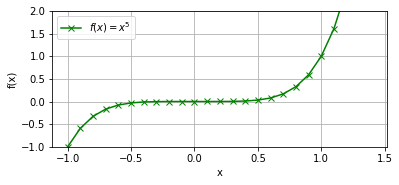

In [0]:
import matplotlib.pyplot as plt

exp = 5
x = np.arange(-1, 1.5, 0.1)
y = np.power(x, exp)

plt.figure(figsize=([6, 2.5]))
plt.plot(x, y, color="g", marker="x", label="$f(x)=x^{}$".format(exp))
plt.ylim([-1, 2])
plt.xlabel("x"), plt.ylabel("f(x)")
plt.grid()
plt.legend();

For more inspiration go to [Matplotlib website](https://matplotlib.org/)

`%matplotlib` magic switches between:
- static inline plots (default) with `%matplotlib inline`
- interactive plots with `%matplotlib qt`

## `17_Pandas.ipynb` recap

**Pandas** (alias `pd`) is a Python package providing fast, flexible, and expressive data
structures designed to make working with "labeled" data both
easy and intuitive. 

**`pd.DataFrame`** is a two-dimensional data structure with labeled axes, rows (`index`) and `column`. The data is often a `np.array`.

**`pd.Series`** is the one-dimensional version of the `pd.DataFrame`.

In [0]:
import pandas as pd

In [0]:
data = [[22, 104], [48, 223], [31, 130]]
cols = ["temperature [°C]", "current [mA]"]
rows = ["before", "during", "after"]

pd.DataFrame(data, columns=cols, index=rows)

,temperature [°C],current [mA]
before,22,104
during,48,223
after,31,130


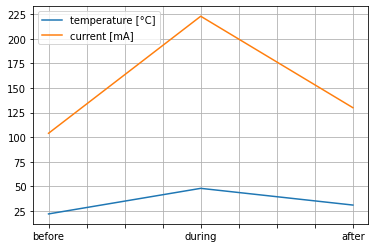

In [0]:
pd.DataFrame(data, columns=cols, index=rows).plot(grid=True);

# 2020-05-22

## [18_Logfiles_w_classes.ipynb](https://colab.research.google.com/github/munich-ml/MLPy2020/blob/master/18_Logfiles_w_classes.ipynb) 



The object oriented implementation of the *logfile challenge* brings some advantages:

**Functions (*methods*) and data bundled in one object**

**Cleaner interfaces and namespace**, e.g. 
> - `log = Log(fn)`
> - `log.plot(sig_names=["sig0_cal"])`            

versus
            
> - `log_data = parse_logfile_string_to_pandas(s)`
> - `plot(log_data, sig_names=["sig0_cal"])`

**overwrite operators** like `__str__`, `__lt__`, ...


## 21_first_machine_lerning_models.ipynb

- **Scikit-learn** offers standard interfaces to its models, e.g. `model.fit(x_train, y_train)`, `model.predict(x_new)`
- **RSME** or *root mean squared error* used as performance criterion for the **regression problem**

- a model is supposed to **generalize** the training data, not to **memorize** it. 
- An **overfitting** model performs much worse *test data* than on the *training RSME*. 
- The common root cause is **too few training data** applied to a **too complex model**.
- **Regularization** helps to avoids overfitting of complex models.
- An **underfitting** model performs bad on both data sets. 
- **Linear regression model** and **Decision tree model**

## 22_end2end_ml_project.ipynb


- `housing` dataset with 10 **attributes** and 20.640 samples
- `medial_house_value` will be the *target attribute*, also called **label**. The other attributes will be the **features**
- the `medial_house_value` distribution is odd, with an obvious cap at 500.000
- 9 attributes are **numerical**, 1 is **categorical**
- The `total_bedrooms` feature is incomplete / has *null* values
- next step: Split data into training and test data

# 2020-05-28
- 

# Ressources

- Harrison Kinsley's [PythonProgramming.net](https://pythonprogramming.net/) is a tutorials site with video & text based tutorials for Python programming.
- Corey Schafer's [YouTube channel](https://www.youtube.com/user/schafer5)
- [Kaggle](https://www.kaggle.com/), the data science community with datasets, notebooks, courses and competition
- Michael Kennedy's [talk Python to me](https://talkpython.fm/) podcast
-  Aurelien Geron _Hands-on Machine Learning with Scikit-learn, Keras & TensorFlow_ [Book on Amazon](https://www.amazon.de/Aur%C3%A9lien-G%C3%A9ron/dp/1492032646/ref=sr_1_3?__mk_de_DE=%C3%85M%C3%85%C5%BD%C3%95%C3%91&dchild=1&keywords=Hands-on+Machine+Learning+with+Scikit-learn%2C+Keras+%26+TensorFlow%2C+Aurelien+Geron%2C&qid=1589875241&sr=8-3)
- Andreas Mueller: _Introduction to Machine Learning with Python_ [Book on Amazon](https://www.amazon.de/Introduction-Machine-Learning-Python-Scientists/dp/1449369413)
- Andreas Mueller: [Applied ML spring semester 2020](https://www.cs.columbia.edu/~amueller/comsw4995s20/), with videos, slices and notebooks
